In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kunshbhatia_delhi_air_quality_dataset_path = kagglehub.dataset_download('kunshbhatia/delhi-air-quality-dataset')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-air-quality-dataset/final_dataset.csv


In [3]:
df_air = pd.read_csv('/kaggle/input/delhi-air-quality-dataset/final_dataset.csv')

In [4]:
df_air.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [5]:
df_air.shape

(1461, 12)

In [6]:
df_air.isnull().sum()

,0
Date,0
Month,0
Year,0
Holidays_Count,0
Days,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0


In [7]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [8]:
df_air.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [9]:
df_air.duplicated().sum()

np.int64(0)

In [10]:
df_air['date'] = df_air['Year'].astype(str) + '-' + df_air['Month'].astype(str) + '-' + df_air['Date'].astype(str)

In [11]:
df_air

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,date
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-1-1
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-1-2
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-1-3
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-1-4
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263,2024-12-27
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113,2024-12-28
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142,2024-12-29
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116,2024-12-30


In [12]:
from datetime import datetime

df_air['date'] = df_air['date'].apply(lambda date: datetime.strptime(date, '%Y-%m-%d'))

In [13]:
df_air

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,date
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263,2024-12-27
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113,2024-12-28
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142,2024-12-29
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116,2024-12-30


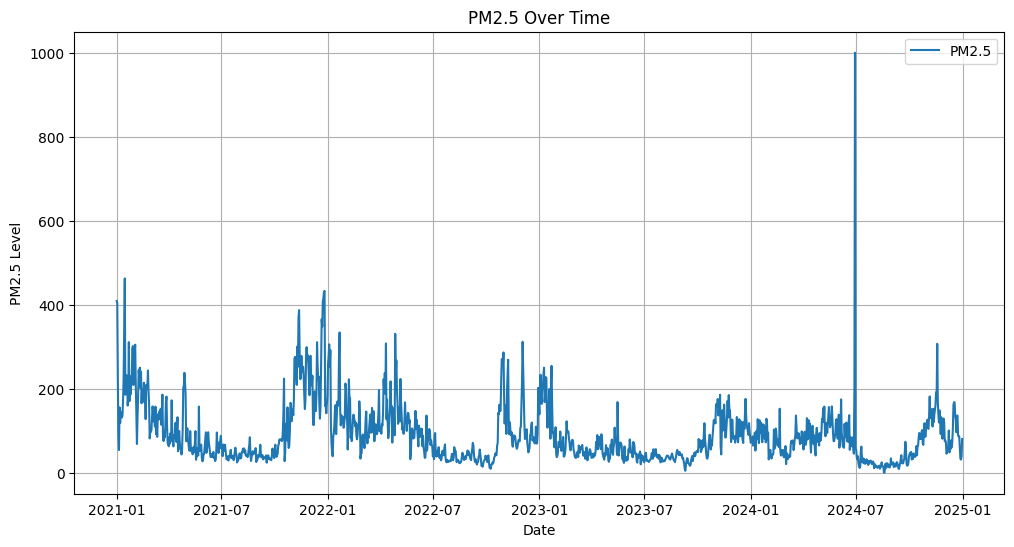

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_air['date'], df_air['PM2.5'], label='PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 Over Time')
plt.legend()
plt.grid(True)
plt.show()

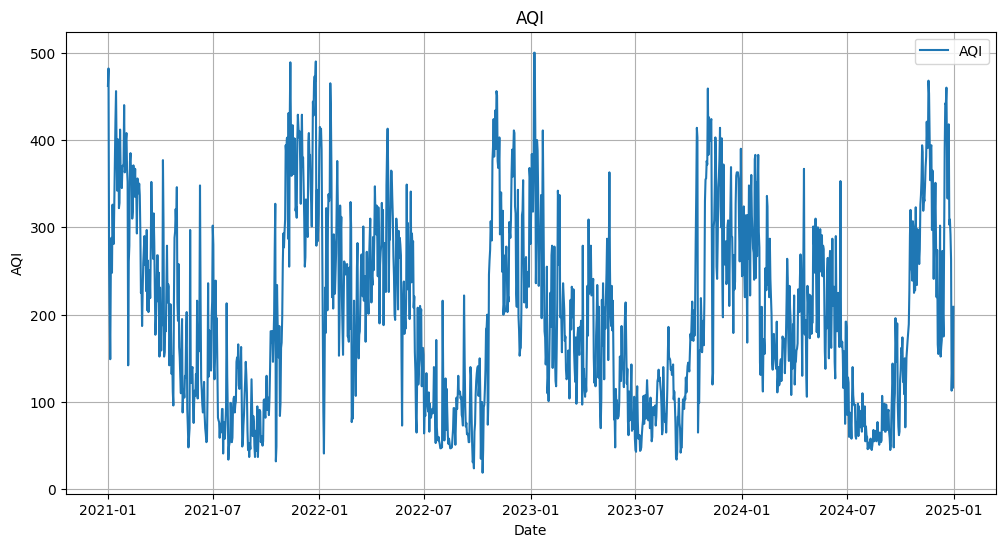

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_air['date'], df_air['AQI'], label='AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI')
plt.legend()
plt.grid(True)
plt.show()

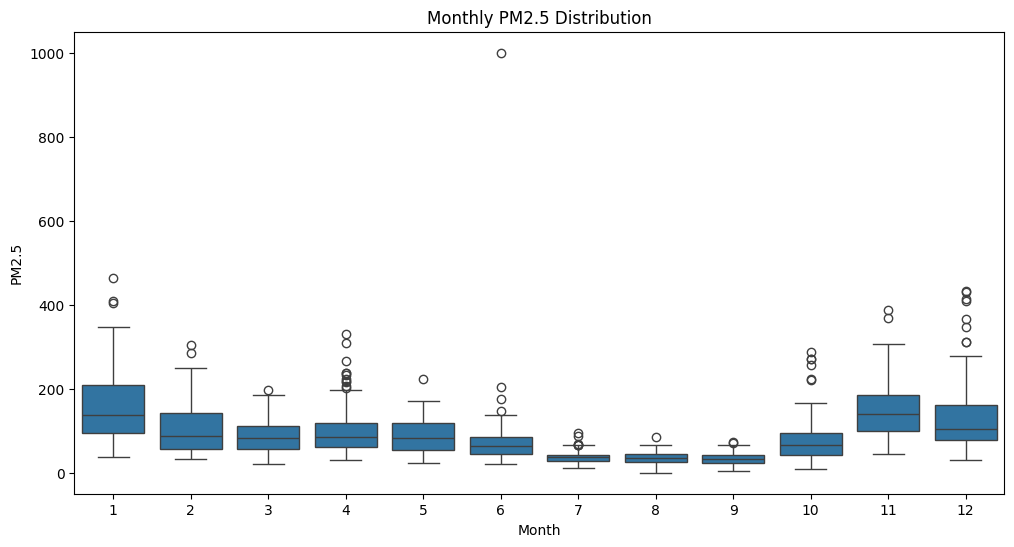

In [16]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='PM2.5', data=df_air)
plt.title('Monthly PM2.5 Distribution')
plt.show()

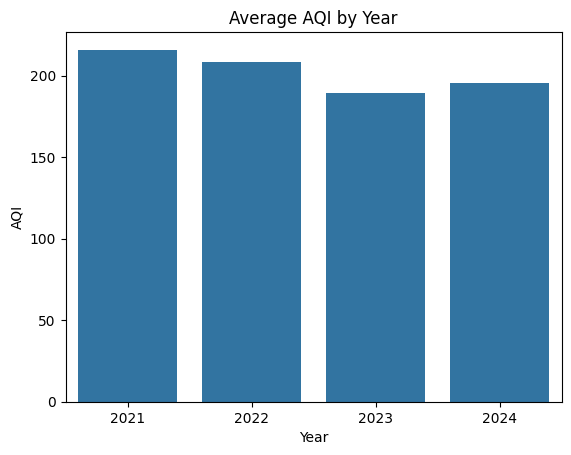

In [17]:
yearly_avg = df_air.groupby('Year')['AQI'].mean().reset_index()
sns.barplot(x='Year', y='AQI', data=yearly_avg)
plt.title('Average AQI by Year')
plt.show()

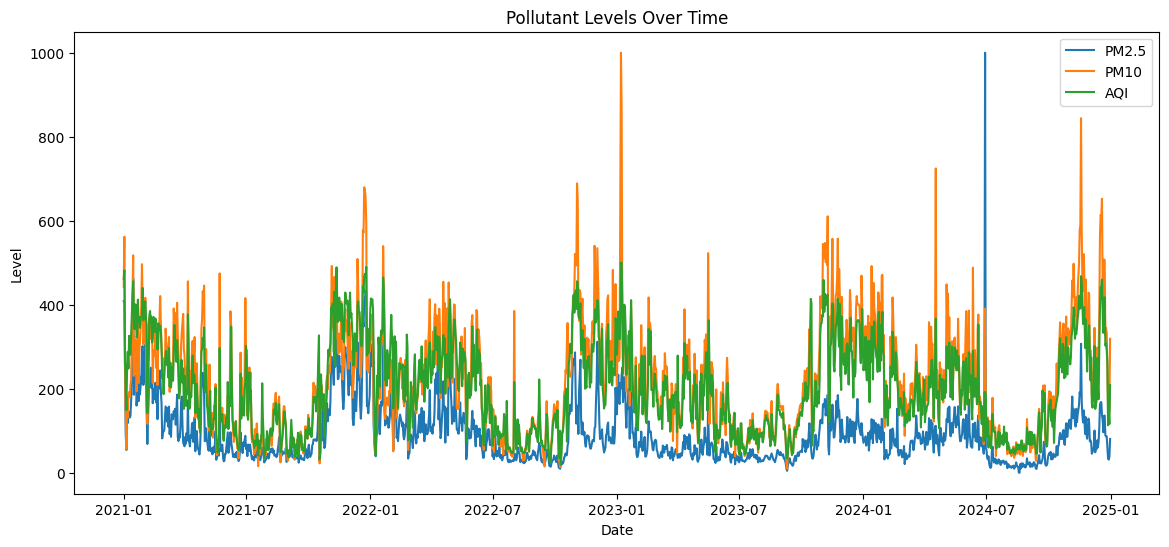

In [18]:
plt.figure(figsize=(14,6))
plt.plot(df_air['date'], df_air['PM2.5'], label='PM2.5')
plt.plot(df_air['date'], df_air['PM10'], label='PM10')
plt.plot(df_air['date'], df_air['AQI'], label='AQI')
plt.legend()
plt.title('Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Level')
plt.show()

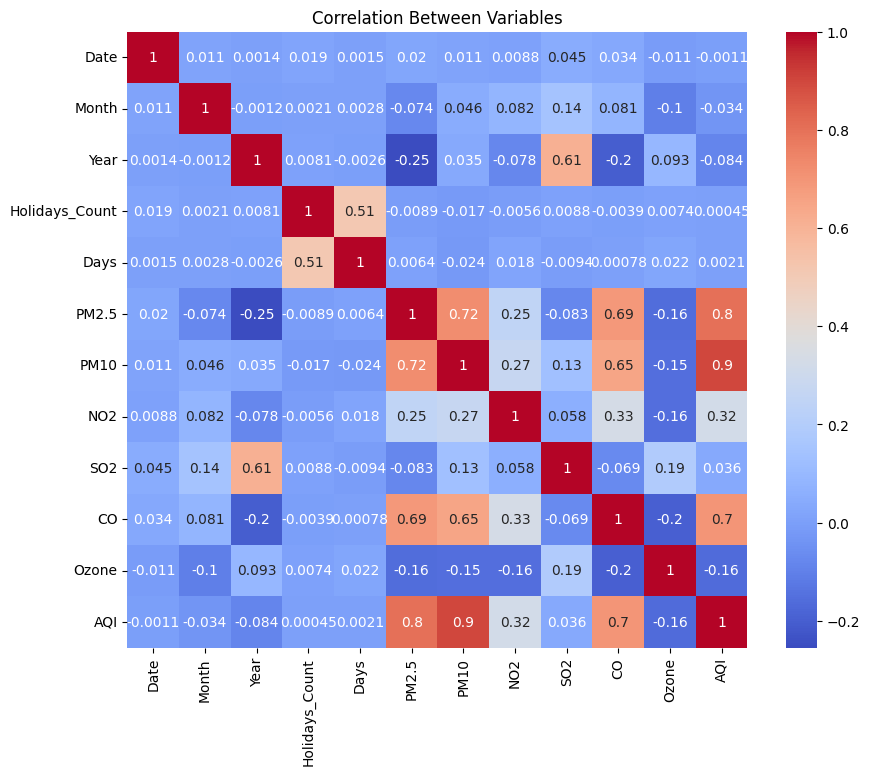

In [19]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df_air.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()


In [20]:
df_air.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,date
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462,2021-01-01
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482,2021-01-02
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263,2021-01-03
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207,2021-01-04
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149,2021-01-05


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [23]:
X = df_air[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']]
y = df_air['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))
    print(f"{name}: MSE = {mse:.2f}, R² = {r2:.4f}")

Linear Regression: MSE = 1457.16, R² = 0.8877
Random Forest: MSE = 848.12, R² = 0.9346
Gradient Boosting: MSE = 774.26, R² = 0.9403
XGBoost: MSE = 939.41, R² = 0.9276
KNN: MSE = 756.52, R² = 0.9417


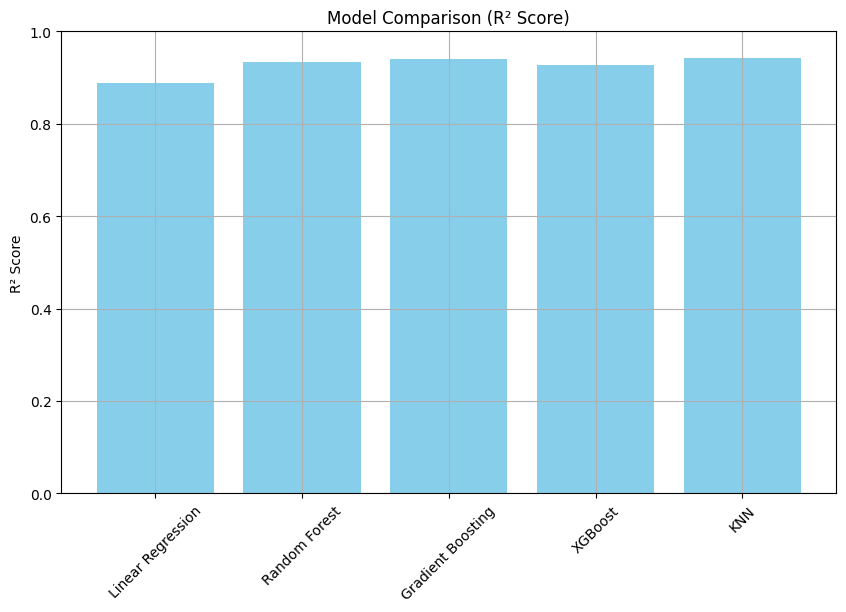

In [25]:
results_df = pd.DataFrame(results, columns=["Model", "MSE", "R2"])

# Barplot
plt.figure(figsize=(10,6))
plt.bar(results_df['Model'], results_df['R2'], color='skyblue')
plt.title('Model Comparison (R² Score)')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [26]:
import pickle

# Access the trained Random Forest model from the dictionary
rf_model = models["Random Forest"]

# Save the model to a file
with open('random_forest_regression_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)